In [1]:
from utils import *
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
foo = VideoSubExtractor('out3.mp4')

NameError: name 'VideoSubExtractor' is not defined

In [3]:
foo.get_subs(max_n=None, use_tqdm=True, out_file='ep1_out_30_09_2024.sub', trad2simple=False)

42421it [03:46, 187.01it/s]                           


In [21]:
self = foo
ret, frame = get_frame_n(self.cap, 9120)
frame = cv.cvtColor(frame, cv.COLOR_RGB2BGR)
# frame[3:-1, :]  # is now 88 Y 550 X
text, binary_text_map = frame_to_text(frame, sam=self.sam)

binary_frame = binary_text_map

text_frame = 255 - 255*binary_frame
cv.imwrite('temp.png', text_frame)

result = reader.readtext('temp.png')
result
res = '\n'.join([res[1] for res in result])
res

cc = opencc.OpenCC('t2s')
out_simplified = cc.convert(res)
out_simplified

True

[([[90, 0], [430, 0], [430, 52], [90, 52]], '那孩子眼中的光芒', 0.9380069268129967),
 ([[71, 39], [453, 39], [453, 94], [71, 94]],
  '就跟他老爸是一個樣',
  0.36490277113224856)]

'那孩子眼中的光芒\n就跟他老爸是一個樣'

'那孩子眼中的光芒\n就跟他老爸是一个样'

In [19]:
result


[([[90, 0], [430, 0], [430, 52], [90, 52]], '那孩子眼中的光芒', 0.9380069268129967),
 ([[71, 39], [453, 39], [453, 94], [71, 94]],
  '就跟他老爸是一個樣',
  0.36490277113224856)]

In [14]:
foo.get_subs(9210, use_tqdm=True, out_file='temp.txt')




















































 22%|██▏       | 9229/42408 [00:12<00:43, 765.03it/s]


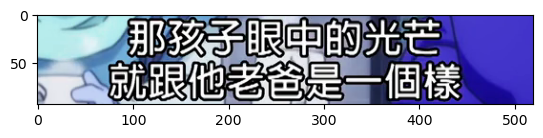

In [4]:
ret, frame = get_frame_n(foo.cap, 9120)
plt.imshow(frame)

In [9]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["<model_type>"](checkpoint="<path/to/checkpoint>")

KeyError: '<model_type>'

In [10]:
sam_model_registry

{'default': <function segment_anything.build_sam.build_sam_vit_h(checkpoint=None)>,
 'vit_h': <function segment_anything.build_sam.build_sam_vit_h(checkpoint=None)>,
 'vit_l': <function segment_anything.build_sam.build_sam_vit_l(checkpoint=None)>,
 'vit_b': <function segment_anything.build_sam.build_sam_vit_b(checkpoint=None)>}

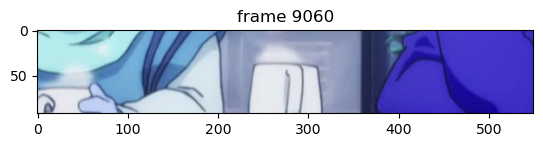

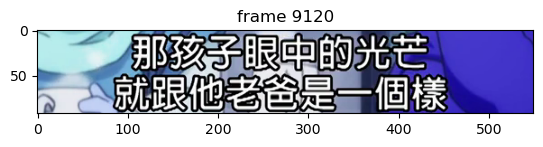

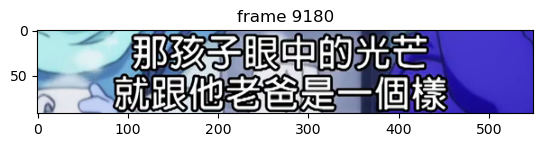

In [4]:
for frame_n in np.arange(9060, 9210, 60):
    frame_n = int(frame_n)
    ret, frame = get_frame_n(foo.cap, frame_n)
    _ = plt.figure()
    _ = plt.imshow(frame)
    _ = plt.title(f'frame {frame_n}')


9064 9180 9209


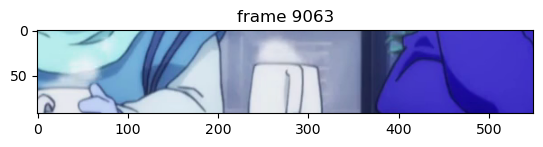

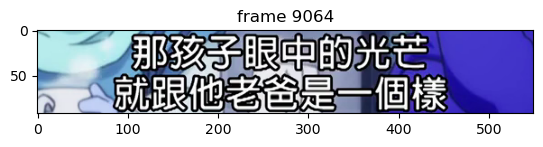

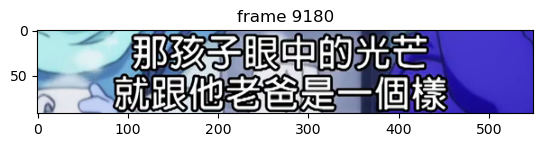

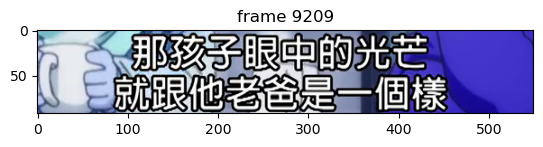

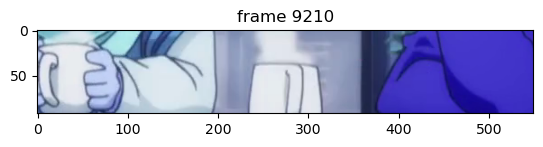

In [12]:
frame_n = 9180
first = foo.get_last_same_frame(frame_n, delta=-10)
second = foo.get_last_same_frame(frame_n, delta=10)
print(first, frame_n, second)

for frame_i in [first -1, first, frame_n, second, second + 1]:
    ret, frame = get_frame_n(foo.cap, frame_i)
    _ = plt.figure()
    _ = plt.imshow(frame)
    _ = plt.title(f'frame {frame_i}')

In [6]:
file = 'ep1.txt'
with open(file, 'r') as f:
    stuff = f.readlines()

In [7]:
import re

# get indices of lines which begin with \d* \d* .*
indices = [i for i, line in enumerate(stuff) if re.match('\d* \d* .*', line)]
outputs = []

for i in range(len(indices)):
    start_idx = indices[i]
    end_idx = indices[i+1] if i+1 < len(indices) else len(stuff)
    text = re.match('\d* \d* (.*)', stuff[start_idx]).group(1)
    start_frame, end_frame = re.match('(\d*) (\d*) .*', stuff[start_idx]).groups()
    for j in range(start_idx+1, end_idx):
        text += stuff[j]

    outputs.append((int(start_frame), int(end_frame), text.rstrip()))






In [25]:
import pysubs2

In [26]:
outputs

[(169, 248, ':曰/`-亡[+5\n\n3#三 口水'),
 (249, 308, '1 )<///闩#\n)/1~\n芒;\n$\n志\n41亡'),
 (343, 373, ')1`2人1)7<1,$\n沈\n(\n立'),
 (383, 429, '斤8/已|$#人171(雕匕\n咤  \n三三.{古  士\n7,='),
 (458, 524, '# ]/_13'),
 (731, 778, "!.:^!2=$1=!'=-/1|`17=,1=/~心`!"),
 (779, 895, "!=- -41#`口?=\n1/~\n0+'"),
 (896, 1060, '^士.=人川=日)于口_\n1 >\n= +一 {'),
 (1068, 1169, '9 "5.! {0.1111|11己山=山\n\n~(;'),
 (1183, 1243, '1[|/01-7{)呈道'),
 (1246, 1310, '叫1+50\n叫踊#口\n二'),
 (1308, 1350, '仙+-1\n1\n心#山_'),
 (1351, 1432, "_7~11=111-/0/=土)1~芒3\n1)`1)'+\n山2 == 二"),
 (1450, 1508, '_7~11-31=":3..0~;``!!$+.):-~芒3\n:)+:\n1==二'),
 (1509, 1555, '己1*[曰1/~-=:.=|[+5\n\n44= 口水('),
 (1589, 1687, '心必= /日#王/\n)/1\n芝汾\n丸\n/\n三1口亡'),
 (1688, 1777, '/1/#人1-7<1[儿0\n; :1 元\n二/古心 女\n二'),
 (1778, 1874, '7 ]/+11~100\n1+|\n ='),
 (1909, 1928, '|1*口/~)1日`1`+//5\n$芒'),
 (1929, 2007, '吐 {<<旦" +/兀 #=}@云$'),
 (2025, 2063, ';_18口/~)1 日`1~+]/71\n$芒'),
 (2064, 2135, '~5凡~日7-0#=1 心匕\n扔'),
 (2136, 2208, '<1!~5!20$1"&$-0{=/$9云8\n;='),
 (2514, 2540, '怪兽'),
 (2585, 2

In [27]:
with open('ep1.sub', 'w') as f:
    for start_n, end_n, text in outputs:
        # print(start_n, end_n, text)
        _ = f.write('{%s}{%s}%s\n' % (start_n, end_n, text))
        

In [34]:
fps = foo.cap.get(cv.CAP_PROP_FPS)

In [35]:
idk = pysubs2.load("ep1.sub", fps=fps)

In [48]:
subs_srt = idk.to_string('srt', format='utf-8')

In [46]:
with open('ep1.srt', 'w') as f:
    _ = f.write(subs_srt)

In [47]:
subs_srt

'1\n00:00:05,639 --> 00:00:08,275\n:曰/`-亡[+5\n\n2\n00:00:08,308 --> 00:00:10,277\n1 )<///闩#\n\n3\n00:00:11,445 --> 00:00:12,446\n)1`2人1)7<1,$\n\n4\n00:00:12,779 --> 00:00:14,314\n斤8/已\n$#人171(雕匕\n\n5\n00:00:15,282 --> 00:00:17,484\n# ]/_13\n\n6\n00:00:24,391 --> 00:00:25,959\n!.:^!2=$1=!\'=-/1\n`17=,1=/~心`!\n\n7\n00:00:25,993 --> 00:00:29,863\n!=- -41#`口?=\n\n8\n00:00:29,897 --> 00:00:35,369\n^士.=人川=日)于口_\n\n9\n00:00:35,636 --> 00:00:39,006\n9 "5.! {0.1111\n11己山=山\n\n10\n00:00:39,473 --> 00:00:41,475\n1[\n/01-7{)呈道\n\n11\n00:00:41,575 --> 00:00:43,710\n叫1+50\n\n12\n00:00:43,644 --> 00:00:45,045\n仙+-1\n\n13\n00:00:45,078 --> 00:00:47,781\n_7~11=111-/0/=土)1~芒3\n\n14\n00:00:48,382 --> 00:00:50,317\n_7~11-31=":3..0~;``!!$+.):-~芒3\n\n15\n00:00:50,350 --> 00:00:51,885\n己1*[曰1/~-=:.=\n[+5\n\n16\n00:00:53,020 --> 00:00:56,290\n心必= /日#王/\n\n17\n00:00:56,323 --> 00:00:59,293\n/1/#人1-7<1[儿0\n\n18\n00:00:59,326 --> 00:01:02,529\n7 ]/+11~100\n\n19\n00:01:03,697 --> 00:01:04,331\n1*口/~)1日`1`+//5\n\n

In [49]:
subs_srt

'1\n00:00:05,639 --> 00:00:08,275\n:曰/`-亡[+5\n\n2\n00:00:08,308 --> 00:00:10,277\n1 )<///闩#\n\n3\n00:00:11,445 --> 00:00:12,446\n)1`2人1)7<1,$\n\n4\n00:00:12,779 --> 00:00:14,314\n斤8/已\n$#人171(雕匕\n\n5\n00:00:15,282 --> 00:00:17,484\n# ]/_13\n\n6\n00:00:24,391 --> 00:00:25,959\n!.:^!2=$1=!\'=-/1\n`17=,1=/~心`!\n\n7\n00:00:25,993 --> 00:00:29,863\n!=- -41#`口?=\n\n8\n00:00:29,897 --> 00:00:35,369\n^士.=人川=日)于口_\n\n9\n00:00:35,636 --> 00:00:39,006\n9 "5.! {0.1111\n11己山=山\n\n10\n00:00:39,473 --> 00:00:41,475\n1[\n/01-7{)呈道\n\n11\n00:00:41,575 --> 00:00:43,710\n叫1+50\n\n12\n00:00:43,644 --> 00:00:45,045\n仙+-1\n\n13\n00:00:45,078 --> 00:00:47,781\n_7~11=111-/0/=土)1~芒3\n\n14\n00:00:48,382 --> 00:00:50,317\n_7~11-31=":3..0~;``!!$+.):-~芒3\n\n15\n00:00:50,350 --> 00:00:51,885\n己1*[曰1/~-=:.=\n[+5\n\n16\n00:00:53,020 --> 00:00:56,290\n心必= /日#王/\n\n17\n00:00:56,323 --> 00:00:59,293\n/1/#人1-7<1[儿0\n\n18\n00:00:59,326 --> 00:01:02,529\n7 ]/+11~100\n\n19\n00:01:03,697 --> 00:01:04,331\n1*口/~)1日`1`+//5\n\n